In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
n_trials = 100_000

## Exercises

### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
#### a. What is the probability that no cars drive up in the noon hour?

Text(0.5, 0, 'Cars Waiting')

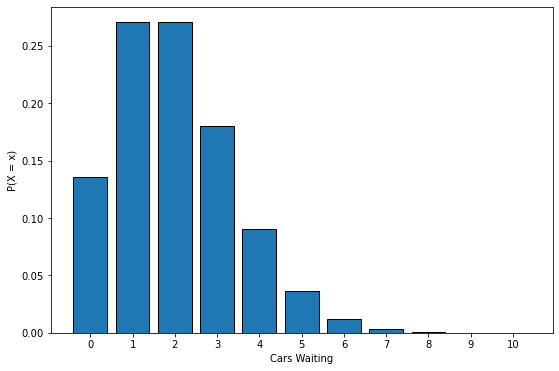

In [3]:
x = range(11)
y = stats.poisson(2).pmf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black')
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Cars Waiting')

In [4]:
stats.poisson(2).cdf(0)

0.1353352832366127

#### Simulation

In [6]:
no_of_cars = np.random.poisson(2, n_trials).reshape(n_trials, 1)
(np.count_nonzero(no_of_cars == 0, axis=1) == 1).mean()

0.13501

####  b. What is the probability that 3 or more cars come through the drive through?

In [7]:
stats.poisson(2).sf(2)

0.32332358381693654

#### Simulation

In [8]:
more_than_3 = np.random.poisson(2, n_trials).reshape(n_trials, 1)
(np.count_nonzero(more_than_3 >= 3, axis=1) == 1).mean()

0.32411

#### c. How likely is it that the drive through gets at least 1 car?

In [9]:
stats.poisson(2).sf(0)

0.8646647167633873

#### Simulation

In [10]:
at_least_1 = np.random.poisson(2, n_trials).reshape(n_trials, 1)
(np.count_nonzero(at_least_1 >= 1, axis=1) == 1).mean()

0.86492

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [11]:
mu = 3
sigma = 0.3
grades = stats.norm(mu, sigma)

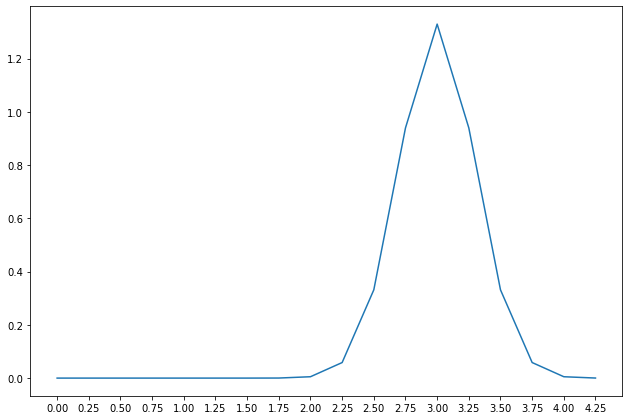

In [12]:
x = np.arange(0, 4.5, 0.25)
plt.figure(figsize=(9, 6))
plt.xticks(x)
plt.tight_layout()
plt.plot(x, grades.pdf(x))

#### What grade point average is required to be in the top 5% of the graduating class?

In [13]:
grades.ppf(.95)

3.4934560880854417

#### Simulation

In [14]:
top_5_gpa = np.random.normal(mu, sigma, n_trials)
np.percentile(top_5_gpa, 95)

3.4959351093115285

#### What GPA constitutes the bottom 15% of the class?

In [15]:
grades.ppf(.15)

2.689069983151863

#### Simulation

In [16]:
bottom_15_gpa = np.random.normal(mu, sigma, n_trials)
np.percentile(bottom_15_gpa, 15)

2.6930416466803475

#### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [17]:
bottom_30_percent_cutoff = grades.ppf(.30)
bottom_20_percent_cutoff = grades.ppf(.20)

In [18]:
(bottom_20_percent_cutoff, bottom_30_percent_cutoff,)

(2.7475136299281258, 2.842679846187588)

The student with a 2.8 GPA would be eligibile for the scholarship.

#### Simulation

In [19]:
bottom_30 = np.random.normal(mu, sigma, n_trials)
np.random.normal(mu, sigma)

2.9369375018159394

#### If I have a GPA of 3.5, what percentile am I in?

In [20]:
grades.cdf(3.5)

0.9522096477271853

#### Simulation

In [34]:
(np.random.normal(mu, sigma, size=(n_trials, 1)) < 3.5).mean()

0.95242

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [38]:
click_rate = .02
visitors = 4326
clicks = 97
expected = click_rate * visitors
stats.poisson(expected).sf(96)

0.14211867659283192

#### Simulation

In [57]:
exp_clicks = np.random.poisson(expected, visitors).reshape(visitors, 1)
(exp_clicks >= 97).mean()

0.1435506241331484

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### What is the probability that at least one of your first 60 answers is correct?

In [58]:
correct_question = stats.binom(60, 1/101).sf(0)
#probability is 1/100 because the total number of numbers <= to 100 but >= to 0 is 101
correct_question

0.44955038406224

TypeError: 'str' object is not callable

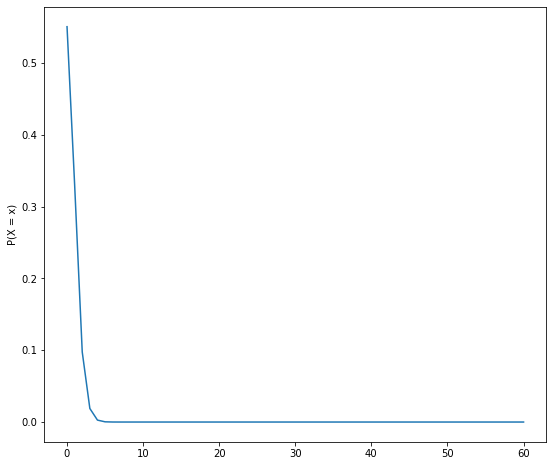

In [119]:
x = range(0, 61)
plt.figure(figsize=(9, 8))
plt.plot(x, stats.binom(60, 1/101).pmf(x))
plt.ylabel('P(X = x)')
plt.xlabel('Number of Correct Questions')

#### Simulation

In [120]:
outcomes = ["Correct", "Incorrect"]
answers = np.random.choice(outcomes, size=(n_trials, 60), p=[1/101, 100/101])
(np.count_nonzero(answers == 'Correct', axis=1) >= 1).mean()

0.45107

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.

#### How likely is it that the break area gets cleaned up each day? 

In [121]:
μ = .03
students = 22 * 3

In [122]:
breakroom_users = .9 * students
breakroom_users = round(breakroom_users)
breakroom_users

59

In [123]:
cleaned_breakroom = stats.binom(breakroom_users, μ).sf(0)
cleaned_breakroom

0.8342199288437355

##### simulation

In [124]:
outcomes = ["clean", "messy"]
breakroom_status = np.random.choice(outcomes, size=(n_trials, breakroom_users), p=[μ, 1-μ])
breakroom_status

array([['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ...,
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy']],
      dtype='<U5')

In [125]:
(np.count_nonzero(breakroom_status == 'clean', axis=1) >= 1).mean()

0.83247

#### How likely is it that it goes two days without getting cleaned up?

In [126]:
messy_day = 1 - (np.count_nonzero(breakroom_status == 'clean', axis=1) >= 1).mean()
messy_day**2

0.028066300899999987

##### simulation

In [127]:
two_day_status = np.random.choice(outcomes, size=(n_trials, 2), p=[cleaned_breakroom, 1-cleaned_breakroom])
two_day_status

array([['clean', 'clean'],
       ['clean', 'clean'],
       ['clean', 'messy'],
       ...,
       ['clean', 'messy'],
       ['clean', 'clean'],
       ['messy', 'clean']], dtype='<U5')

In [128]:
(np.count_nonzero(two_day_status == 'messy', axis=1) == 2).mean()

0.02668

#### All week?

In [129]:
week_status = np.random.choice(outcomes, size=(n_trials, 5), p=[1-messy_day, messy_day])
week_status

array([['clean', 'messy', 'messy', 'messy', 'clean'],
       ['clean', 'clean', 'clean', 'clean', 'messy'],
       ['clean', 'clean', 'messy', 'clean', 'messy'],
       ...,
       ['clean', 'clean', 'clean', 'clean', 'messy'],
       ['clean', 'messy', 'messy', 'clean', 'clean'],
       ['clean', 'clean', 'clean', 'messy', 'clean']], dtype='<U5')

In [130]:
(np.count_nonzero(week_status == 'messy', axis=1) == 5).mean()

0.00013

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [131]:
μ = 15
#people in line
σ = 3

t_to_order = 2
t_to_get = 10
t_to_eat_food = 15
lunch = 60

In [132]:
people_in_line = stats.norm(μ, σ)

In [133]:
max_time_to_wait = lunch - t_to_order - t_to_get - t_to_eat_food
#hour lunch minus time to order and receive food minus time to eat food

max_people = int(max_time_to_wait / 2)
#highest possible amount of people ahead of you to finish within an hour
max_people

16

In [134]:
people_in_line.cdf(max_people)

0.6305586598182363

TypeError: 'str' object is not callable

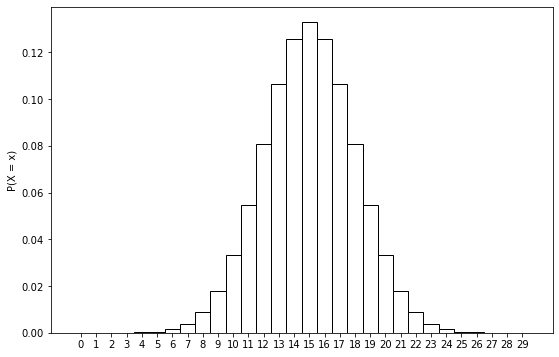

In [135]:
#graph
x = range(30)
y = people_in_line.pdf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel("People Waiting")

In [ ]:
#simulation
outcomes = ['under', "over"]
rand_people = np.random.normal(μ, σ, size=(n_trials, 1))

In [136]:
np.count_nonzero(rand_people <= 16, axis=1).mean()

0.63019

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [137]:
from env import user, password, host

In [138]:
def get_data_from_sql(user, host, password, database, query):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
        
    return pd.read_sql(query, url)

In [139]:
query = '''
SELECT *
FROM employees
RIGHT JOIN employees.salaries
ON employees.emp_no = salaries.emp_no
WHERE salaries.to_date > NOW();
'''
df = get_data_from_sql(user, host, password, "employees", query)
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,499995,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,499996,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,55003,2001-12-25,9999-01-01


In [140]:
avg_salary = int(df.salary.mean())
std_dev = round(np.std(df.salary))
employees = stats.norm(avg_salary, std_dev)

#### What percent of employees earn less than 60,000?

In [141]:
employees.cdf(60000)

0.2438617554963023

##### simulation

In [142]:
(df.salary < 60_000).mean()

0.2705727041028802

#### What percent of employees earn more than 95,000?

In [143]:
employees.sf(95_000)

0.09208599994106093

##### simulation

In [144]:
(df.salary > 95_000).mean()

0.1086272092752078

#### What percent of employees earn between 65,000 and 80,000?

In [145]:
(employees.sf(60_000) + employees.cdf(80_000)) - 1

0.4339065775978632

In [146]:
((df.salary <= 80_000).mean() + (df.salary >= 65_000).mean()) - 1

0.3251570022155219

#### What do the top 5% of employees make?

In [147]:
employees.isf(.05)

100484.41628253

In [148]:
df.salary

0         88958
1         72527
2         43311
3         74057
4         94692
          ...  
240119    52868
240120    69501
240121    83441
240122    55003
240123    77303
Name: salary, Length: 240124, dtype: int64

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

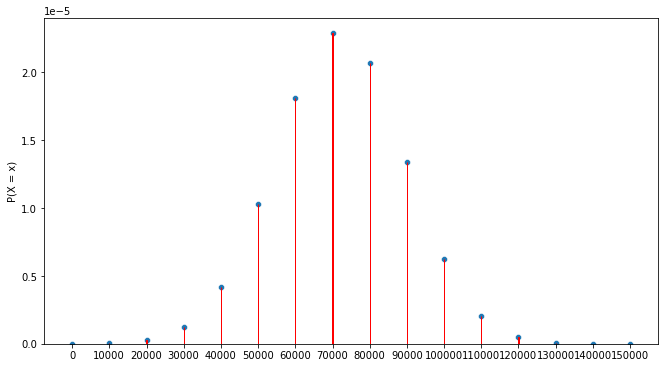

In [149]:
x = range(0, 160000, 10000)
y = employees.pdf(x)
plt.figure(figsize=(11, 6))
sns.scatterplot(x, y)
plt.bar(x, y, edgecolor='red')
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Employee Salary')
plt.tight_layout()